In [1]:
from numpy import *; from numpy.core.records import fromarrays;from scipy.constants import *
from matplotlib.pyplot import *
import sys; sys.path.insert(0,'/home/noah/Desktop/large_analysis/ca_analysis/'); import os
import predefined as pd; import fileread as fr
from numba import jit
from random import seed,shuffle
import pickle




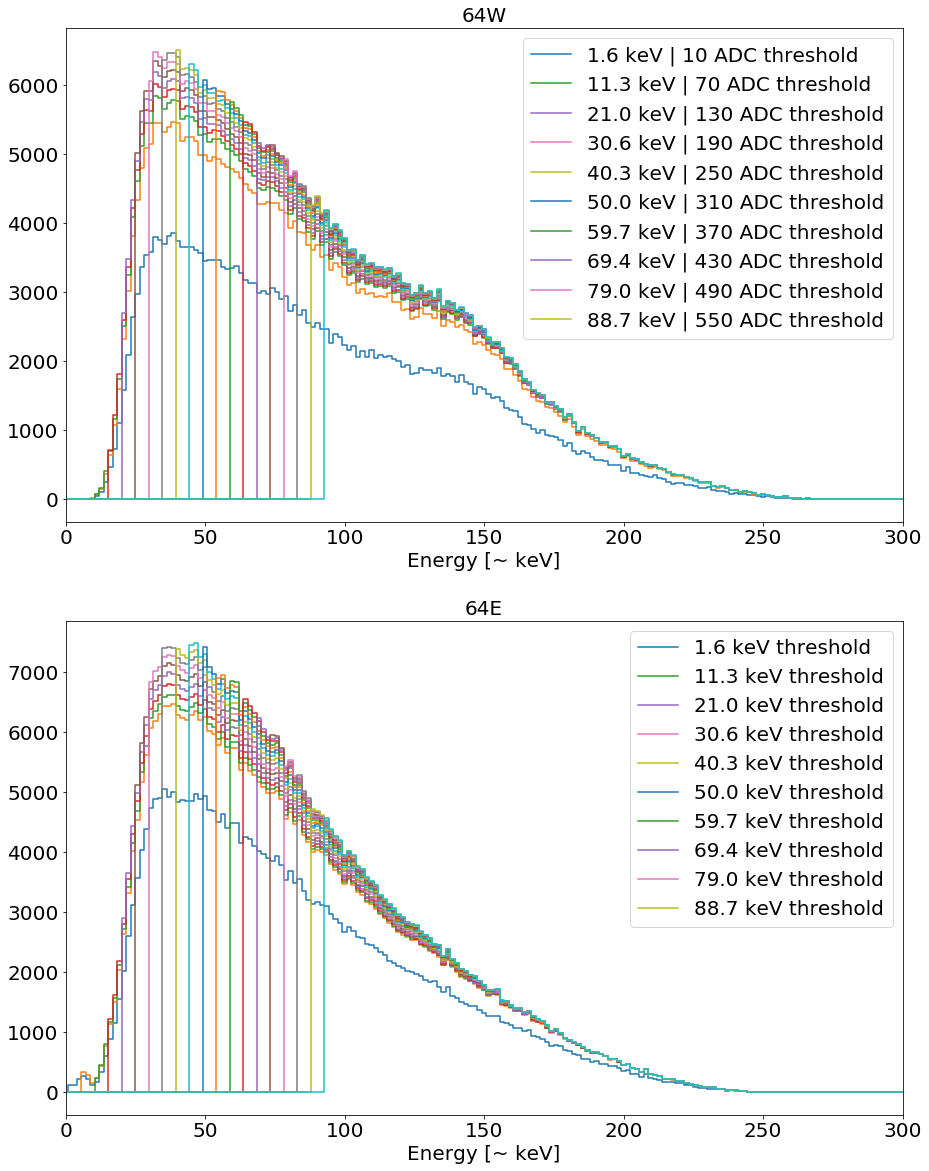

In [2]:
fs=20
path='/home/noah/Desktop/large_analysis/ca_analysis/cur_data/'
runs=[run for run in os.listdir(path) if run.endswith('-all.dat')]
runs.sort()
j=3
seed(10)
shuffle(runs)
nbins,rang=500,[0,5000]

fig,ax=subplots(nrows=2,figsize=(15,20))

threshes=np.arange(10,600,30)
for i,thresh in enumerate(threshes):

    data=pd.precuts(fr.gen_output(path+runs[j])[0],energy=thresh,oscillation=True,osc_amp=50)
    bd,ch=divmod(11,8)
    t=(data.board==bd)*(data.channel==ch)
    d_hist,bins=np.histogram(data.energy[t],bins=nbins,range=rang)
    bins=pd.cbins(bins).astype(float)
    if i%2==0:
        ax[0].plot(bins/6.2,d_hist,ds='steps',label='{:0.1f} keV | {:0d} ADC threshold'.format(thresh/6.2,thresh))
    else:
        ax[0].plot(bins/6.2,d_hist,ds='steps')
    
    bd,ch=divmod(35,8)
    t=(data.board==bd)*(data.channel==ch)
    d_hist,bins=np.histogram(data.energy[t],bins=nbins,range=rang)
    bins=pd.cbins(bins).astype(float)
    if i%2==0:
        ax[1].plot(bins/6.2,d_hist,ds='steps',label='{:0.1f} keV threshold'.format(thresh/6.2))
    else:
        ax[1].plot(bins/6.2,d_hist,ds='steps')
    
ax[0].set_title(pd.pixel(1,3),fontsize=fs)
ax[1].set_title(pd.pixel(4,3),fontsize=fs)

for i in [0,1]:
    ax[i].set_xlabel('Energy [~ keV]',fontsize=fs)
    ax[i].tick_params(labelsize=fs)
    ax[i].legend(fontsize=fs)
    ax[i].set_xlim(0,300)
show()

122


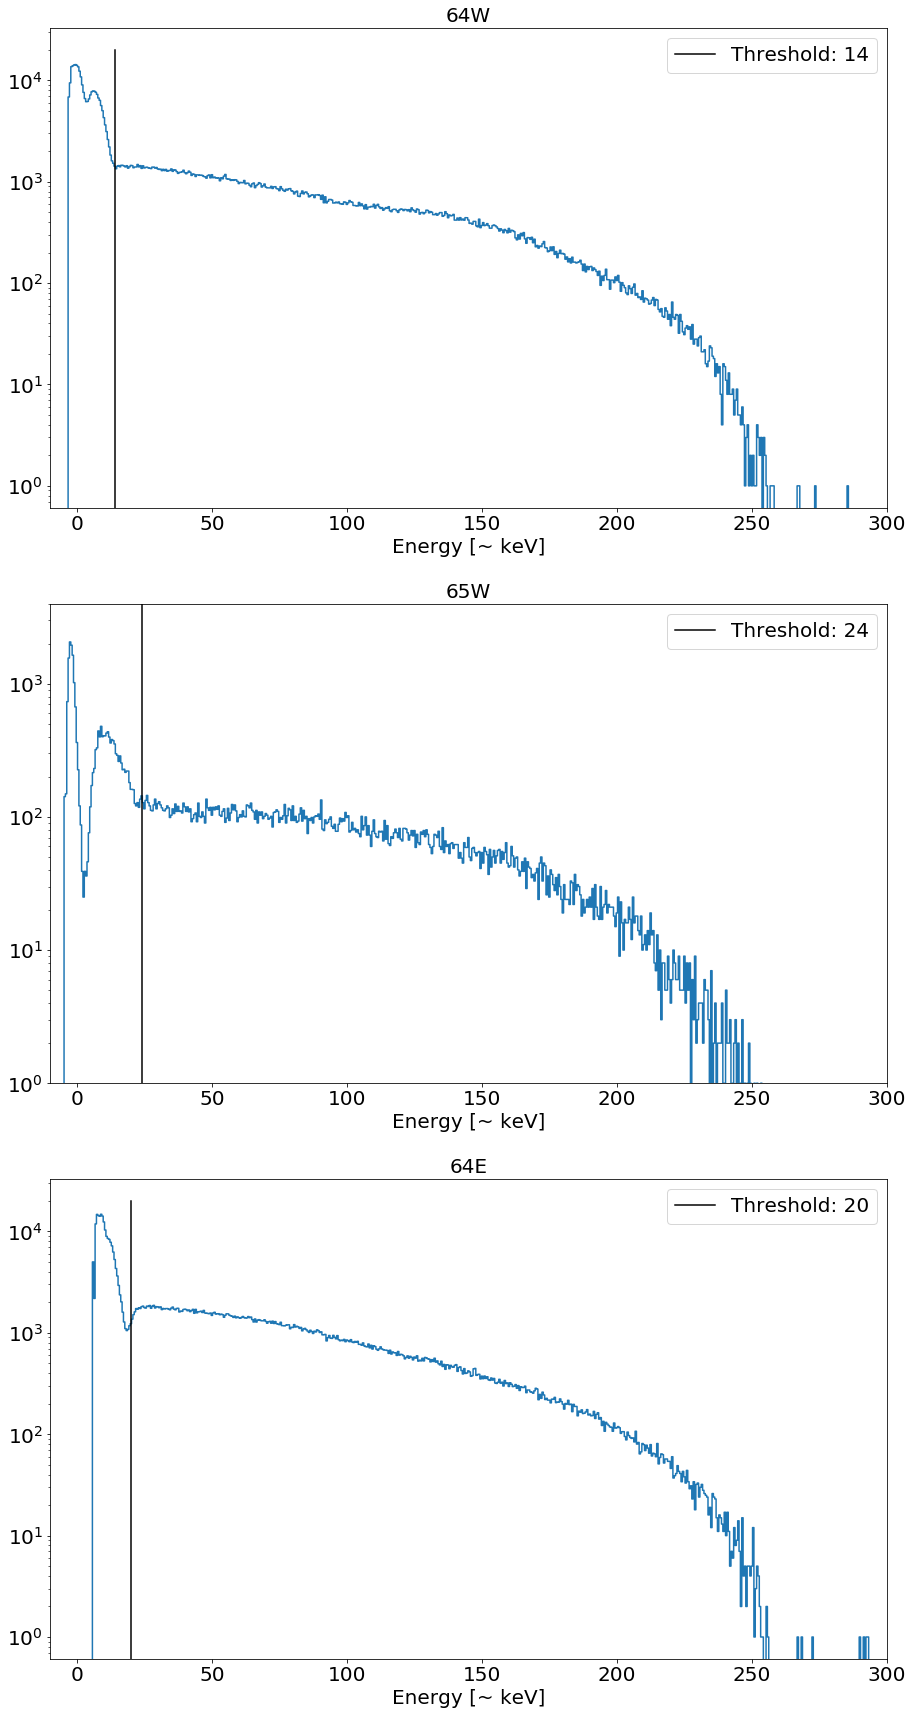

In [3]:
fs=20
path='/home/noah/Desktop/large_analysis/ca_analysis/cur_data/'
runs=[run for run in os.listdir(path) if run.endswith('-all.dat')]
runs.sort()
j=4
seed(10)
print(runs[j][4:-8])
shuffle(runs)
nbins,rang=1000,[-100,400]

pix_threshes={}



threshes=np.arange(10,600,30)

fig,ax=subplots(nrows=3,figsize=(15,30))
data=fr.gen_output(path+runs[j])[0].view(recarray)
osc_amp=80
t = np.sqrt(np.sum(data['osc_amps'][:,0:2]**2.,axis=1)) < osc_amp
# data=data[t]
bd,ch=divmod(11,8)
t=(data.board==bd)*(data.channel==ch)
cal=pd.calibration[np.nonzero((pd.calibration.board==bd)*(pd.calibration.channel==ch))[0][0]]
d_hist,bins=np.histogram((data.energy[t]-cal.offset)/cal.slope,bins=nbins,range=rang)
bins=pd.cbins(bins).astype(float)
ax[0].plot(bins,d_hist,ds='steps')
thresh=14
pix_threshes.update({int(8*bd+ch):thresh*cal.slope+cal.offset})
ax[0].plot((thresh,thresh),(0,2e4),'k',label='Threshold: {:0d}'.format(thresh))
ax[0].set_title(pd.pixel(bd,ch),fontsize=fs)

bd,ch=divmod(12,8)
t=(data.board==bd)*(data.channel==ch)
cal=pd.calibration[np.nonzero((pd.calibration.board==bd)*(pd.calibration.channel==ch))[0][0]]
d_hist,bins=np.histogram((data.energy[t]-cal.offset)/cal.slope,bins=nbins,range=rang)
bins=pd.cbins(bins).astype(float)
ax[1].plot(bins,d_hist,ds='steps')
thresh=24
pix_threshes.update({int(8*bd+ch):thresh*cal.slope+cal.offset})
ax[1].plot((thresh,thresh),(0,2e4),'k',label='Threshold: {:0d}'.format(thresh))
ax[1].set_ylim(1,4e3)
ax[1].set_title(pd.pixel(bd,ch),fontsize=fs)

bd,ch=divmod(35,8)
t=(data.board==bd)*(data.channel==ch)
cal=pd.calibration[np.nonzero((pd.calibration.board==bd)*(pd.calibration.channel==ch))[0][0]]
d_hist,bins=np.histogram((data.energy[t]-cal.offset)/cal.slope,bins=nbins,range=rang)
bins=pd.cbins(bins).astype(float)
ax[2].plot(bins,d_hist,ds='steps')
thresh=20
pix_threshes.update({int(8*bd+ch):thresh*cal.slope+cal.offset})
ax[2].plot((thresh,thresh),(0,2e4),'k',label='Threshold: {:0d}'.format(thresh))
ax[2].set_title(pd.pixel(bd,ch),fontsize=fs)


for i in [0,1,2]:
    ax[i].set_xlabel('Energy [~ keV]',fontsize=fs)
    ax[i].tick_params(labelsize=fs)
    ax[i].legend(fontsize=fs)
    ax[i].set_yscale('log')
    ax[i].set_xlim(-10,300)
show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


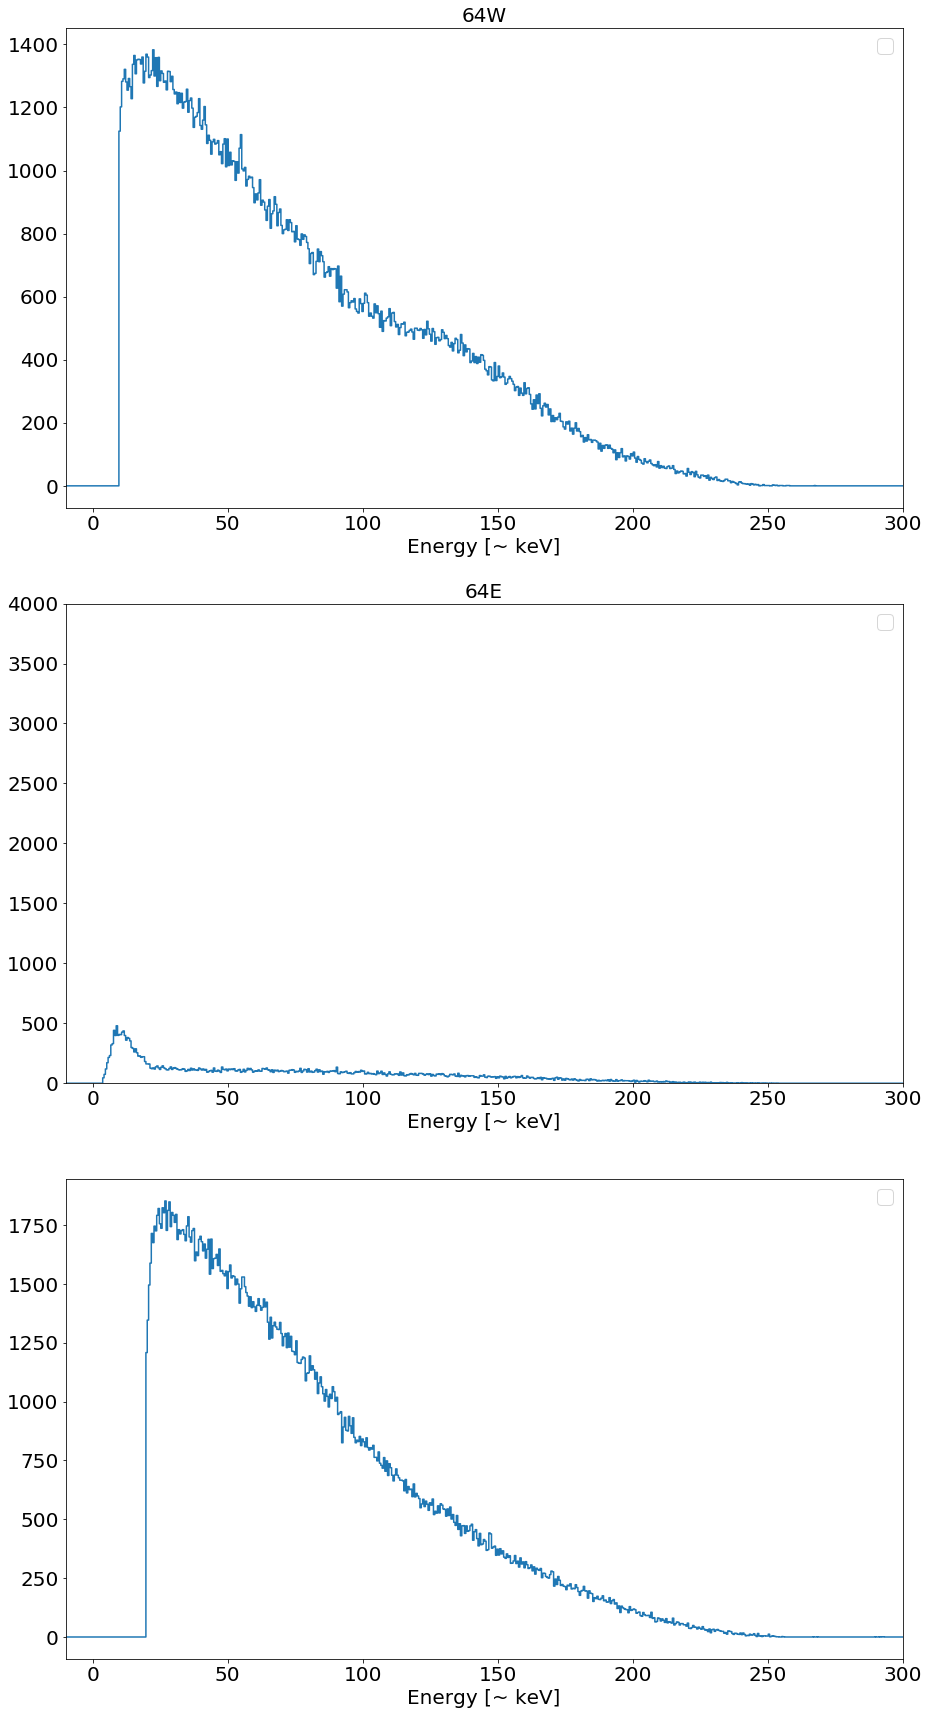

In [50]:
fig,ax=subplots(nrows=3,figsize=(15,30))
bd,ch=divmod(11,8)
t=(data.board==bd)*(data.channel==ch)
cal=pd.calibration[np.nonzero((pd.calibration.board==bd)*(pd.calibration.channel==ch))[0][0]]
d_hist,bins=np.histogram((data.energy[t]-cal.offset)/cal.slope,bins=nbins,range=rang)
bins=pd.cbins(bins).astype(float)
ax[0].plot(bins,d_hist,ds='steps')

bd,ch=divmod(12,8)
t=(data.board==bd)*(data.channel==ch)
cal=pd.calibration[np.nonzero((pd.calibration.board==bd)*(pd.calibration.channel==ch))[0][0]]
d_hist,bins=np.histogram((data.energy[t]-cal.offset)/cal.slope,bins=nbins,range=rang)
bins=pd.cbins(bins).astype(float)
ax[1].plot(bins,d_hist,ds='steps')
ax[1].set_ylim(0,4e3)

bd,ch=divmod(35,8)
t=(data.board==bd)*(data.channel==ch)
cal=pd.calibration[np.nonzero((pd.calibration.board==bd)*(pd.calibration.channel==ch))[0][0]]
d_hist,bins=np.histogram((data.energy[t]-cal.offset)/cal.slope,bins=nbins,range=rang)
bins=pd.cbins(bins).astype(float)
ax[2].plot(bins,d_hist,ds='steps')

    
ax[0].set_title(pd.pixel(1,3),fontsize=fs)
ax[1].set_title(pd.pixel(4,3),fontsize=fs)

for i in [0,1,2]:
    ax[i].set_xlabel('Energy [~ keV]',fontsize=fs)
    ax[i].tick_params(labelsize=fs)
    ax[i].legend(fontsize=fs)
    ax[i].set_xlim(-10,300)
show()

In [15]:
def s_pixel(x,E_select=0,t_select=250):
    '''Returns events events that are isolated to t_select in time from any events with E> E_select'''
    x.sort(order='timestamp')
    t0,t1,t2=x['timestamp'][0:-2],x['timestamp'][1:-1],x['timestamp'][2:]
    ecut=(x['energy'][0:-2]<E_select)*(x['energy'][2:]<E_select)
    print(np.sum(ecut))
    trutharray=(t2-t1>t_select)*(t1-t0>t_select)+ecut
    return x[1:-1][trutharray]

@jit(nopython=True)
def s_pixel1(energies,timestamps,E_select=0,t_select=250):
    '''Returns events events that are isolated to t_select in time from any events with E> E_select'''
    trutharray=np.zeros(len(energies)-2)
    count=0
    for i in range(len(energies[1:-1])):
        t0,t1,t2=timestamps[i-1],timestamps[i],timestamps[i+1]
        e0,e2=energies[i-1],energies[i+1]        
        trutharray[i]=(((t2-t1)>t_select)+(e2<E_select))*((t1-t0)>t_select)+(e0<E_select)
        if trutharray[i]==0 and count<20:
            count+=1
    return trutharray

s_pixel1(np.zeros(4),np.zeros(4))

array([0., 0.])

122


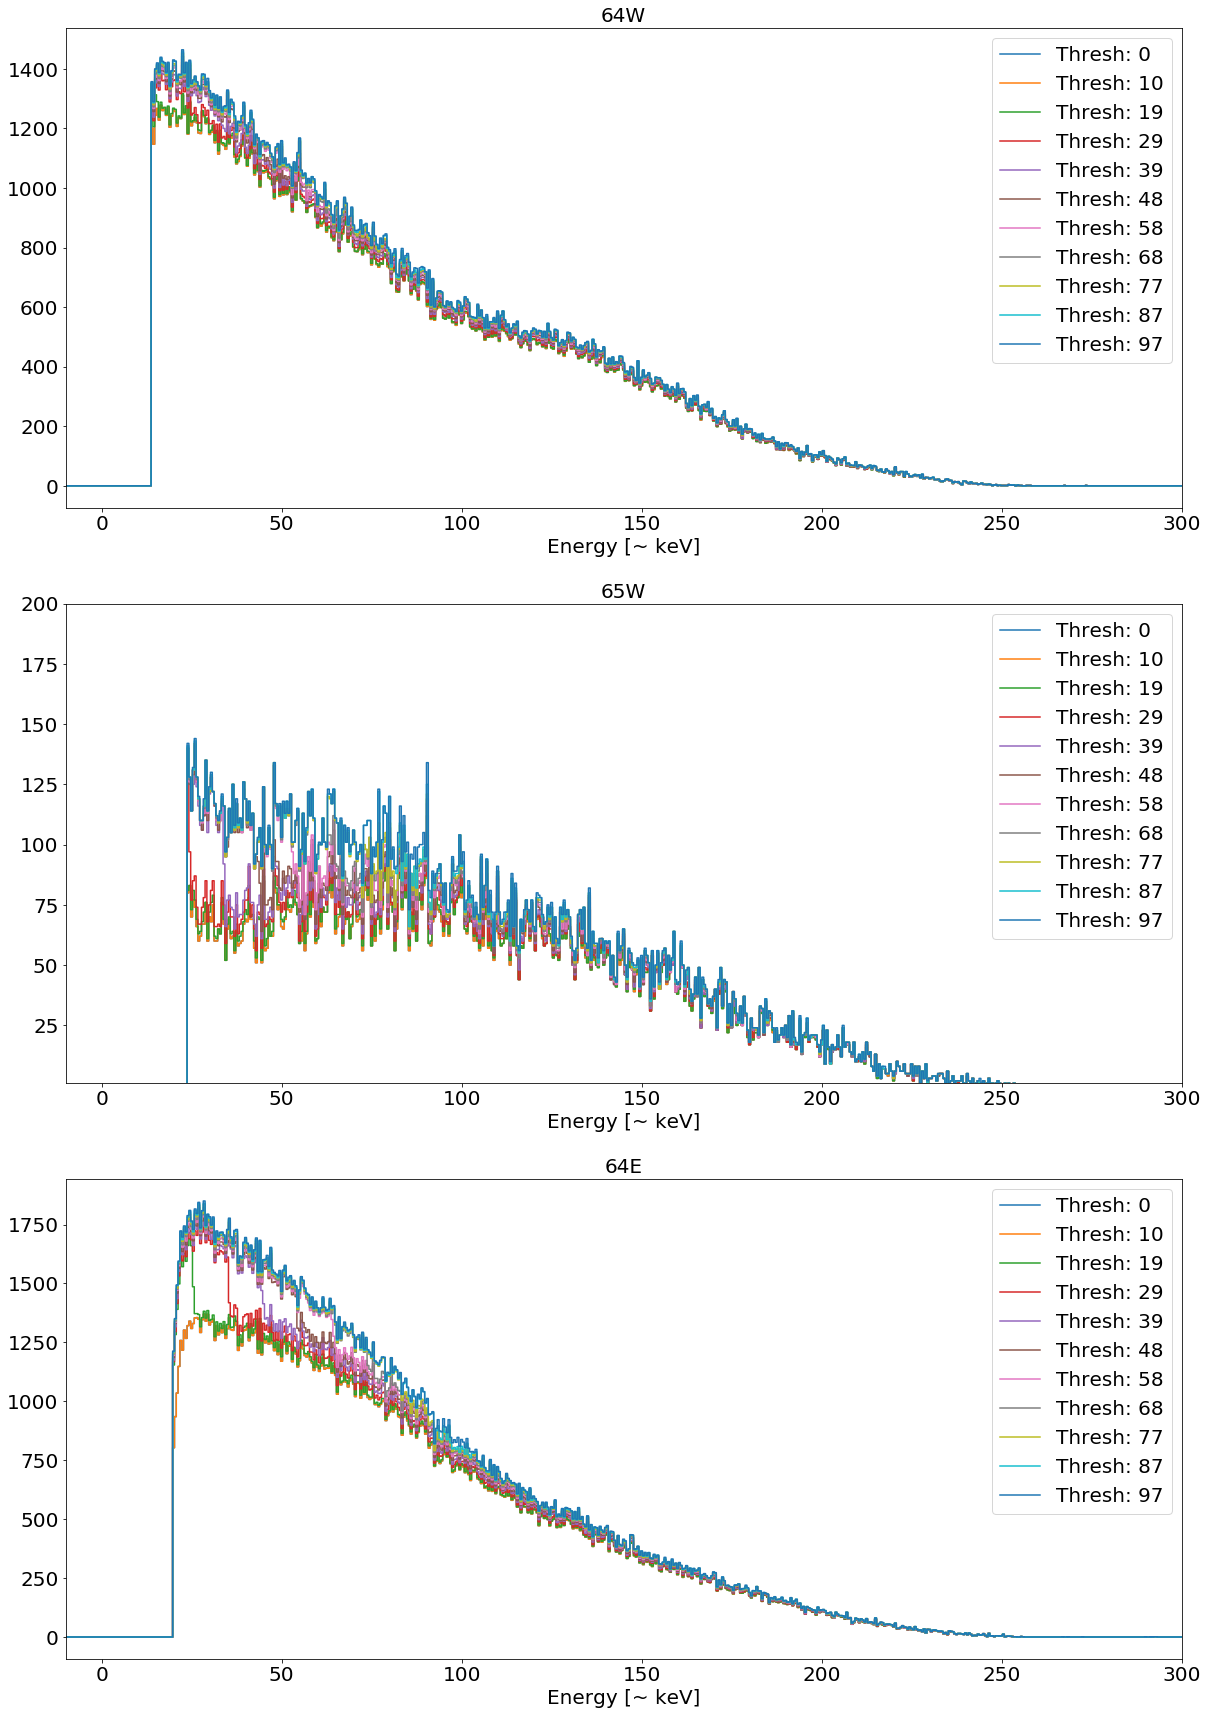

In [19]:
fs=20
path='/home/noah/Desktop/large_analysis/ca_analysis/cur_data/'
runs=[run for run in os.listdir(path) if run.endswith('-all.dat')]
runs.sort()
j=4
seed(10)
print(runs[j][4:-8])
shuffle(runs)
nbins,rang=1000,[-100,400]


threshes=np.arange(0,610,60)

fig,ax=subplots(nrows=3,figsize=(20,30))
for thresh in threshes:

    data=fr.gen_output(path+runs[j])[0].view(recarray)
    osc_amp=100
    t = np.sqrt(np.sum(data['osc_amps'][:,0:2]**2.,axis=1)) < osc_amp
    data=data[t]
#     data.sort(order='timestamp')
    bdchs=[11,12,35]

    t=np.zeros(len(data),dtype=bool)
    for bdch in bdchs:
        cal=pd.calibration[np.nonzero((pd.calibration.board==bd)*(pd.calibration.channel==ch))[0][0]]
        bd,ch=divmod(bdch,8)
        temp=(data.board==bd)*(data.channel==ch)*(data.energy>pix_threshes[bdch])
        t+=temp
    data=data[t]
    data.sort(order='timestamp')
#     data=s_pixel(data,E_select=thresh)
    t=s_pixel1(data.energy,data.timestamp,E_select=thresh).astype(bool)
    data=data[1:-1][t]



    bd,ch=divmod(11,8)
    t=(data.board==bd)*(data.channel==ch)
    cal=pd.calibration[np.nonzero((pd.calibration.board==bd)*(pd.calibration.channel==ch))[0][0]]
    d_hist,bins=np.histogram((data.energy[t]-cal.offset)/cal.slope,bins=nbins,range=rang)
    bins=pd.cbins(bins).astype(float)
    ax[0].plot(bins,d_hist,ds='steps',label='Thresh: {:0.0f}'.format(thresh/6.2))
    ax[0].set_title(pd.pixel(bd,ch),fontsize=fs)

    bd,ch=divmod(12,8)
    t=(data.board==bd)*(data.channel==ch)
    cal=pd.calibration[np.nonzero((pd.calibration.board==bd)*(pd.calibration.channel==ch))[0][0]]
    d_hist,bins=np.histogram((data.energy[t]-cal.offset)/cal.slope,bins=nbins,range=rang)
    bins=pd.cbins(bins).astype(float)
    ax[1].plot(bins,d_hist,ds='steps',label='Thresh: {:0.0f}'.format(thresh/6.2))
    ax[1].set_ylim(1,1e3)
    ax[1].set_title(pd.pixel(bd,ch),fontsize=fs)

    bd,ch=divmod(35,8)
    t=(data.board==bd)*(data.channel==ch)
    cal=pd.calibration[np.nonzero((pd.calibration.board==bd)*(pd.calibration.channel==ch))[0][0]]
    d_hist,bins=np.histogram((data.energy[t]-cal.offset)/cal.slope,bins=nbins,range=rang)
    bins=pd.cbins(bins).astype(float)
    ax[2].plot(bins,d_hist,ds='steps',label='Thresh: {:0.0f}'.format(thresh/6.2))
    ax[1].set_ylim(1,2e2)
    ax[2].set_title(pd.pixel(bd,ch),fontsize=fs)


for i in [0,1,2]:
    ax[i].set_xlabel('Energy [~ keV]',fontsize=fs)
    ax[i].tick_params(labelsize=fs)
    ax[i].legend(fontsize=fs)
#     ax[i].set_yscale('log')
    ax[i].set_xlim(-10,300)
tight_layout
show()